# Assignment Netwerkanalyse

## Notebook made by

**Gebruik graag dit formaat**

* Voor de namen:  voornaam rest van je naam, voornaam rest van je naam,....
* je studentnummers: hetzelfde: scheidt met `,`
* je emails: hetzelfde: scheidt met `,`
* voor je groep: alleen de hoofdletter (dus voor de groep van Marx zou je `A` kiezen)

__Namen__:Anoniem
__Emails__:Anoniem
__Student id__:Anoniem
__Groep__:Anoniem

## Toelichting

* De meeste opgaven worden automatisch nagekeken. Bij vrijwel alle opdrachten staan er een paar tests onder de opdracht, dit is voornamelijk om te zorgen dat je de juiste type output geeft. Dit zijn dus *NIET* alle tests, die komen er bij het graden nog bij.
* Elke vraag is 1 punt waard, tenzij anders aangegeven. Soms is die punt onderverdeeld in deelpunten, maar niet altijd. 

## Voor het inleveren!

* Pas niet de cellen aan, vooral niet die je niet kunt editen. Dit levert problemen op bij nakijken. Twijfel je of je per ongeluk iets hebt gewijzigd, kopieer dan bij inleveren je antwoorden naar een nieuw bestand, zodat het niet fout kan gaan.

* Zorg dat de code goed runt van boven naar beneden, verifieer dat door boven in Kernel -> Restart & Run All uit te voeren

## Na het inleveren!

* Het gebeurt erg vaak dat mensen een "leeg bestand" inleveren. Vaak een andere versie van de opgave die nog ergens op je computer rondslingerde. Zonde van al je werk toch!
* Dus, lever **minstens een half uur voor tijd in**. Download dan wat je hebt ingeleverd op Canvas. Geef het een andere naam om verwarring te voorkomen. En draai alle cellen, en bekijk het. Geen syntax fouten? Alle vragen gemaakt? Dan zit het vast wel goed, en hoef je niet in de zenuwen te zitten.

# Week 6

In [1]:
%matplotlib inline
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from nose.tools import assert_equal, assert_count_equal
from numpy.testing import assert_almost_equal
import math

# First Course: chap 3.3 Friendship Paradox

1. Maak een netwerkx netwerk van Figuur 3.5.
2. Waarom is de kans dat je Tom vindt met de "random friend of picked person" methode $\frac{5}{21}$. Geef een heel helder antwoord.
3. Programmeer de functie `kans_op_knoop(G,knoop)` die voor elk netwerk, voor elke knoop de kans berekent dat je die knoop trekt met de "random friend of picked person" methode.
4. Schrijf een test die checked dat die kansen optellen tot 1.
5. **Advanced** In de een na laatste paragraaf van 3.3 op blz 76 wordt een andere manier om die kansen te berekenen gemeld, die dezelfde uitkomst geeft. Programmeer die ook, en vergelijk de uitkomsten.
    

0.06948529411764706

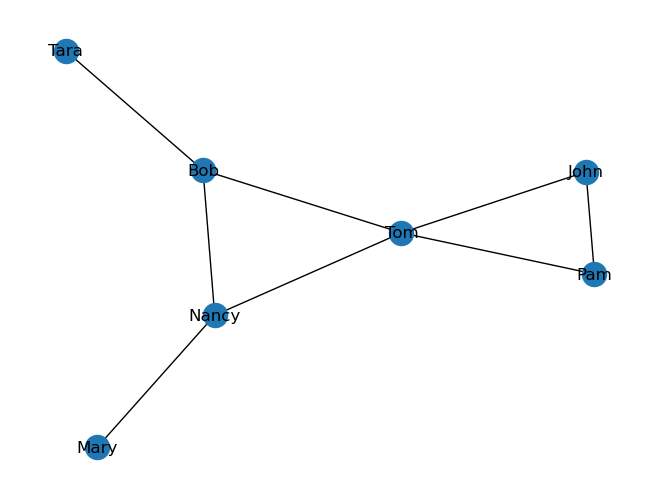

In [2]:
Fig35=nx.Graph()
nodes = ['Mary', 'Nancy', 'Tara', 'Tom', 'John', 'Pam', 'Bob']
edges = [['Mary', 'Nancy'], ['Nancy', 'Tom'], ['Nancy', 'Bob'], ['Bob', 'Tara'], 
         ['Bob', 'Tom'], ['Tom', 'Pam'], ['Tom', 'John'], ['John', 'Pam']]

Fig35.add_nodes_from(nodes)
Fig35.add_edges_from(edges)

# 2. Waarom is de kans dat je Tom vindt met de "random friend of picked person" methode  521
# antwoord staat onder deze vraag

def kans_op_knoop(G,knoop):
    #WRITE YOUR CODE HERE
    kans = 0
    
    for i in G.nodes:
        if i in G.neighbors(knoop):
            kans += (1/len(G)) * (1/ len(list(G.neighbors(i))))
    return kans
 
nx.draw(Fig35, with_labels=True)

H= nx.karate_club_graph() 
# test

sum(kans_op_knoop(H,x) for x in H)

kans_op_knoop(H,1)

In [3]:
assert isinstance(Fig35, nx.Graph)
H= nx.karate_club_graph()
assert 0 <= kans_op_knoop(H,1)<= 1


All paths to reach Tom (neighbors of Tom) following the random friend of picked person method:

Nancy -> Tom <br>
Bob -> Tom <br>
Pam -> Tom <br>
John -> Tom <br>

One of these four has to be picked in order for Tom to be the outcome of the random friend of picked person method.

The probabilities of these paths can be calculated as follows: <br>

Probability (Nancy -> Tom) = 1/7 * 1/3 = 1/21 <br>
Probability (Bob -> Tom) = 1/7 * 1/3 = 1/21 <br>
Probability (Pam -> Tom) = 1/7 * 1/2 = 1/14 <br>
Probability (John -> Tom) = 1/7 * 1/2 = 1/14 <br>

The probability that you pick a random person is 1/7 (7 persons in the graph), the probability that tom is the random friend of the picked person depends on the number of neighbors of this person (so 1/3 for nancy and bob (3 neighbors), and 1/2 for pam and john (2 neighbors)).

Adding up these probabilities: <br>

Probability (finding Tom) = 1/21 + 1/21 + 1/14 + 1/14 = 5/21

# First course

Maak de sommen 3.11-3.24.

11. 1. Highest degree centrality: node 2 & 5
    2. Highest betweenness centrality: node 2
    3. Highest closeness centrality: node 2


12. star graph

13. 1. no, normally distributed because there are no insane large sizes.
    2. yes, some households make way more many than the average household.
    3. yes, some accounts have way more followers than average
    4. no, the pairwise distance is normally distributed. The distance between two pages is limited by the number of links between those pages.
    
14. Yes, because the probability is very low.

15. 1. 500 million (between 1e+08 and 1e+09)
    2. 1 million
    3. 10.000
    
16. maximum degree in this network: 1000. Male have a higher degree than woman, but the degree distribution is alike.
17. 1. Average degree = 10.19
    2. Top five airports: {'ATL': 153, 'ORD': 149, 'DEN': 148, 'DFW': 138, 'MSP': 117}
    3. one route: see list from code
    4. highest closeness centrality: DEN
    5. highest betweenness centrality: AZA
    6. heterogeneity paramater: 5.35
18. 1. average in-degree: 12.753153745072273
        average out-degree: 12.753153745072273
    2. node with highest in-degree: 1152126, with in-degree: 5171
    3. node with highest out-degree: 47738065, with out-degree: 1356
    4. The maximum in-degree is greater (5171). This means a lot of pages link to this specific page. I would expect this to be the same for other webpages. The higher in-degree of a specific page, suggests that it is heavily referenced and linked to by many other pages, which is likely a common trend among web pages. 
    5. heterogeneity paramater: 1065.1269480782614
    6. heterogeneity paramater: 1065.1269480782614
    
19. Check code below

20. Yes, in a graph where every node has the same number of neighbors (degree).

21. Networks with heavy-tailed distribution are more vulnerable to targeted attacks. In heavy-tailed distributed networks there are often a few nodes with a very high degree, and thus high importance in the graph. If one of these hubs are removed, it has a huge impact on the rest of the network. In grid-like networks, targeted attacks are less impactful because the degree distribution is not concentrated in a few hubs. Random attacks have more impact on a grid-like networks, because it can lead to isolated clusters and fragmentation of the network. This can disrupt the overall connectivity.

22. d. nodes/edges with high betweenness centrality.
       These nodes play an important part in the connectivity of a network.
       
23. The node with high clustering coefficient. Removing such a node would disrupt the connections within its cluster, which could lead to isolation or fragmentation of the cluster.

24. 1. proportion of nodes with degree over 100: 3988

    2. maximum degree: 2105
    3. node with maximum degree: 8262
    4. 95th percentile for degree: 244
    5. mean degree: 92.42680041639065
    6. c. Right-tailed

In [4]:
fname='../../../data/Week6/openflights_usa.edges.gz'
G= nx.Graph()
G = nx.read_edgelist(fname)

In [5]:
# exercise 3.17

from operator import itemgetter
# 1. average number of routes
avg = (2 * G.number_of_edges()) / G.number_of_nodes()
print('average number of routes: ', avg)

#2. top five airports in number of routes
degrees = {i: G.degree(i) for i in G.nodes}
top_five = dict(sorted(degrees.items(), key=itemgetter(1), reverse=True)[:5])
print('top five airports:', top_five)

#3. airports with one route
one_route = [i for i in G.nodes if G.degree(i) == 1]
print('airports with one route:',one_route)

#4. highest closeness centrality
closeness = [(i, nx.closeness_centrality(G, i)) for i in G.nodes]
closeness.sort(key=lambda x: x[1], reverse=True)
highest_closeness = closeness[0][0]
print('highest closeness centrality:', highest_closeness)

#5 highest betweenness centrality
betweenness = list(nx.betweenness_centrality(G))
betweenness.sort(key=lambda x: x[1], reverse=True)
highest_betweenness = betweenness[0]
print('highest betweenness centrality:', highest_betweenness)

# hetereogeneity paramater
avg_sq_degree = sum(G.degree(i)**2 for i in G)/G.number_of_nodes()
het_par = avg_sq_degree/(avg ** 2)
print('heterogeneity paramater:', het_par)

average number of routes:  10.186813186813186
top five airports: {'ATL': 153, 'ORD': 149, 'DEN': 148, 'DFW': 138, 'MSP': 117}
airports with one route: ['RDD', 'WLK', 'PKB', 'PAH', 'SMK', 'AKB', 'GCN', 'KFP', 'NLG', 'KLW', 'TOG', 'HNM', 'NIB', 'CIC', 'KUK', 'PSM', 'BLV', 'SLQ', 'HKB', 'MLY', 'CLM', 'KWT', 'HVR', 'TVF', 'EGE', 'CSG', 'LAW', 'FLG', 'ANV', 'TWF', 'KVC', 'GTR', 'PTH', 'AUK', 'BJI', 'MEI', 'CEZ', 'HDN', 'JLN', 'DBQ', 'GGG', 'PVC', 'MTM', 'HYG', 'GGW', 'OGD', 'PIH', 'PDT', 'LUR', 'PIZ', 'TLJ', 'IGG', 'ILI', 'PTU', 'MOU', 'PRC', 'UST', 'RUT', 'SLK', 'BHB', 'RKD', 'AUG', 'PQI', 'MUE', 'SLN', 'MOD', 'CLD', 'MMH', 'VIS', 'MCE', 'ELV', 'AGN', 'GCK', 'TEB', 'LAM', 'PUB', 'AKK', 'VEL', 'CNY', 'BTM', 'EKO', 'CDC', 'HON', 'MSS', 'HOB', 'VCT', 'APF', 'EAT', 'ALW', 'YKM', 'IPT', 'KQA', 'JBR', 'CNM', 'BPT', 'ENA', 'SCK', 'CIU', 'ESC', 'PLN', 'SPS', 'HIB', 'ARC', 'HOM', 'TBN', 'ABR', 'ABY', 'AHN', 'ACT', 'SJT', 'ABI', 'ROW', 'TXK', 'BFF', 'BQK', 'UIN', 'MWA', 'CGI', 'IRK', 'MSL', 'VLD', '

In [6]:
H = nx.DiGraph()
H = nx.read_edgelist('../../../data/Week6/enwiki_math.edges.gz')

In [7]:
# exercise 3.18
# 1. average in- and out-degree
# average in-degree
avg_in = np.mean([H.in_degree(i) for i in H.nodes])
print('average in-degree:', avg_in)
# average out-degree
avg_out = np.mean([H.out_degree(i) for i in H.nodes])
print('average out-degree:', avg_out)

# 2. node with highest in-degree
highest_in = np.max([H.in_degree(i) for i in H.nodes])
highest_node = [(node) for node in H.nodes if H.in_degree(node) == highest_in]
print('node with highest in-degree:', highest_node, 'with in-degree:', highest_in)

# 3. node with highest out-degree
highest_out = np.max([H.out_degree(i) for i in H.nodes])
highest_outnode = [(node) for node in H.nodes if H.out_degree(node) == highest_out]
print('node with highest out-degree:', highest_outnode, 'with out-degree:', highest_out)

# 4. heterogeneity paramater for in-degree distribution
avg_sq_degree_in = sum(H.in_degree(i)**2 for i in H)/H.number_of_nodes()
het_par_in = avg_sq_degree/(avg_in ** 2)
print('heterogeneity paramater in-degree:', het_par_in)


# 4. heterogeneity paramater for out-degree distribution
avg_sq_degree_out = sum(H.out_degree(i)**2 for i in H)/H.number_of_nodes()
het_par_out = avg_sq_degree/(avg_out ** 2)
print('heterogeneity paramater out-degree:', het_par_out)

AttributeError: 'Graph' object has no attribute 'in_degree'

In [8]:
# exercise 3.19
def avg_degree_neighbors(G, node):
    degrees = [G.degree(i) for i in G.neighbors(node)]
    avg_degree = np.mean(degrees)
    
    return avg_degree

avg_degree_neighbors(G, 'DEN')

26.89189189189189

In [9]:
fname= '../../../data/Week6/socfb-Northwestern25.edges.gz'
K = nx.Graph()
K = nx.read_edgelist(fname)

proportion of nodes with degree over 100: 3988
maximum degree: 2105
node with maximum degree: 8262
95th percentile for degree: 244.0
mean degree: 92.42680041639065


<AxesSubplot: >

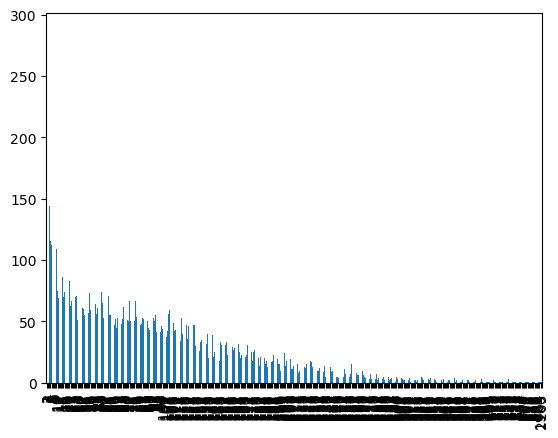

In [10]:
# exercise 3.24
from collections import Counter
import pandas as pd

# 1. proportion of nodes with degree > 100 
degree_over100 = len([node for node in K.nodes if K.degree(node) > 100])
print('proportion of nodes with degree over 100:', degree_over100)

# 2. maximum degree
max_degree = np.max([K.degree(node) for node in K.nodes])
print('maximum degree:', max_degree)

# 3. node with highest degree
node_maxdegree = [node for node in K.nodes if K.degree(node) == max_degree]
print('node with maximum degree:', node_maxdegree[0])

# 4. 95th percentile for degree
degree_dict = dict(K.degree())
degrees = list(degree_dict.values())

percentile_degree = np.percentile(degrees, 95)

print('95th percentile for degree:', percentile_degree)

# 5. mean degree
mean_degree = np.mean([K.degree(node) for node in K.nodes])
print('mean degree:', mean_degree)

# 6. degree distribution
degree_dict = dict(K.degree())
def histogram(K):
    return Counter(K.values())

HH = pd.Series(histogram(degree_dict)).sort_index()
HH.plot(kind = 'bar')